In [ ]:
import sys
!{sys.executable} -m pip install --user scikit-allel

In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.3.8


## VCF to HDF5

In [4]:
allel.vcf_to_hdf5('/users/mcevoysu/scratch/output/Qpubescens/vcf_filtering/raw_SNP.vcf.gz', '/users/mcevoysu/scratch/output/Qpubescens/scikit-allel/raw_SNP.h5', fields='*')

## Get data

In [5]:
callset_var_fn = '/users/mcevoysu/scratch/output/Qpubescens/scikit-allel/raw_SNP.h5'
callset_var = h5py.File(callset_var_fn, mode='r')

In [6]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [7]:
list(callset_var['variants'])

['AC',
 'AF',
 'ALT',
 'AN',
 'BaseQRankSum',
 'CHROM',
 'DP',
 'END',
 'ExcessHet',
 'FILTER_LowQual',
 'FILTER_PASS',
 'FS',
 'ID',
 'InbreedingCoeff',
 'MLEAC',
 'MLEAF',
 'MQ',
 'MQRankSum',
 'POS',
 'QD',
 'QUAL',
 'RAW_MQandDP',
 'REF',
 'ReadPosRankSum',
 'SOR',
 'altlen',
 'is_snp',
 'numalt']

## Make datasets

In [8]:
variants = allel.VariantChunkedTable(callset_var['variants'])
variants

<VariantChunkedTable shape=(670805,) dtype=[('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')]
   nbytes=114.5M cbytes=24.3M cratio=4.7
   values=h5py._hl.group.Group>

In [9]:
variants_np = variants[:]
rawsnps = variants_np.query('(is_snp == True)')
rawsnps

<VariantTable shape=(452557,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 4, -1, -1], [0.016   ,      nan,      nan], [b'G', b'', b''], 250,  nan, b'Qrob_Chr01',  17, -1, 0., False, False, 0.   , b'.', 0.3356, [42, -1, -1], [0.165,   nan,   nan], 60.  ,    nan, 44698, 25.36, 296.28, [-1, -1], b'T',    nan, 2.833, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.007874,      nan,      nan], [b'C', b'', b''], 250,  nan, b'Qrob_Chr01',  18, -1, 0., False, False, 0.   , b'.', 0.3346, [17, -1, -1], [0.067,   nan,   nan], 39.46,    nan, 44768, 28.73, 137.54, [-1, -1], b'T',    nan, 2.303, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.003937,      nan,      nan], [b'A', b'', b''], 250, 0.  , b'Qrob_Chr01',  44, -1, 0., False, False, 0.   , b'.', 0.3209, [ 6, -1, -1], [0.024,   nan,   nan], 42.12,  0.   , 44833, 26.65,  79.95, [-1, -1], b'G',  0.   , 1.179, [0, 0, 0],  True, 1)
 ...
 ([15, -1, -1], [0.059   ,      nan,      nan], [b'G', b'', b''], 250, 3.27, b'Qrob_H2.3_Sc0001194', 182, -1, 0., False, False, 9.442, b'.', 0.3832, [54, -1, -1], [0.213,   nan,   nan], 37.29, -2.429, 24534, 17.  , 509.89, [-1, -1], b'A', -0.96 , 5.435, [0, 0, 0],  True, 1)
 ([15, -1, -1], [0.059   ,      nan,      nan], [b'G', b'', b''], 250, 3.27, b'Qrob_H2.3_Sc0001194', 180, -1, 0., False, False, 9.442, b'.', 0.3807, [54, -1, -1], [0.213,   nan,   nan], 37.54, -2.429, 24547, 17.09, 512.71, [-1, -1], b'A',  0.087, 5.435, [0, 0, 0],  True, 1)
 ([18, -1, -1], [0.071   ,      nan,      nan], [b'T', b'', b''], 250, 1.81, b'Qrob_H2.3_Sc0001194', 168, -1, 0., False, False, 5.618, b'.', 0.3667, [67, -1, -1], [0.264,   nan,   nan], 33.3 , -0.992, 24588, 18.88, 660.79, [-1, -1], b'A',  0.319, 4.31 , [0, 0, 0],  True, 1)]

In [10]:
notsnp = variants_np.query('(is_snp != True)')
notsnp

<VariantTable shape=(218248,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 2, -1, -1], [0.007874,      nan,      nan], [b'*', b'', b''], 250, -1.169, b'Qrob_Chr01', 189, -1, 0.    ,  True, False, 2.963, b'.', 0.3827, [  2,  -1,  -1], [0.007874,      nan,      nan], 56.45, 1.03, 44949, 0.13,  0.25, [-1, -1], b'T', 0.891, 0.148, [-1,  0,  0], False, 1)
 ([16, -1, -1], [0.064   ,      nan,      nan], [b'*', b'', b''], 246,    nan, b'Qrob_Chr01',  82, -1, 0.0002,  True, False, 0.   , b'.', 0.3308, [100,  -1,  -1], [0.4     ,      nan,      nan],   nan,  nan, 58550, 0.  ,  0.  , [-1, -1], b'T',   nan, 4.743, [-1,  0,  0], False, 1)
 ([16, -1, -1], [0.065   ,      nan,      nan], [b'*', b'', b''], 244,    nan, b'Qrob_Chr01',  80, -1, 0.0002,  True, False, 0.   , b'.', 0.3279, [100,  -1,  -1], [0.403   ,      nan,      nan],   nan,  nan, 58551, 0.11,  3.05, [-1, -1], b'T',   nan, 4.743, [-1,  0,  0], False, 1)
 ...
 ([ 2, -1, -1], [0.007874,      nan,      nan], [b'*', b'', b''], 250,    nan, b'Qrob_H2.3_Sc0001163',  91, -1, 0.    ,  True, False, 0.   , b'.', 0.3377, [  4,  -1,  -1], [0.016   ,      nan,      nan],   nan,  nan, 14757, 0.  ,  0.  , [-1, -1], b'G',   nan, 2.303, [-1,  0,  0], False, 1)
 ([ 1, -1, -1], [0.003937,      nan,      nan], [b'*', b'', b''], 250,    nan, b'Qrob_H2.3_Sc0001163', 275, -1, 0.    ,  True, False, 0.   , b'.', 0.3401, [  2,  -1,  -1], [0.007874,      nan,      nan],   nan,  nan, 14904, 0.  ,  0.  , [-1, -1], b'T',   nan, 0.693, [-1,  0,  0], False, 1)
 ([ 1, -1, -1], [0.003937,      nan,      nan], [b'*', b'', b''], 250,    nan, b'Qrob_H2.3_Sc0001163', 275, -1, 0.    ,  True, False, 0.   , b'.', 0.344 , [  2,  -1,  -1], [0.007874,      nan,      nan], 56.  ,  nan, 14905, 6.95, 27.82, [-1, -1], b'A',   nan, 1.022, [-1,  0,  0], False, 1)]

## Plot function

In [11]:
def plot_hist(f, dsubset='', bins=30, ):
    if dsubset == 'var':
        x = variants[f][:]
        l = 'Variant'
    elif dsubset == 'snp':
        x = rawsnps[f][:]
        l = 'Raw SNP'
    elif dsubset == 'notsnp':
        x = notsnp[f][:]
        l = 'Raw Not SNP'
    elif dsubset == 'biallelic':
        x = biallelic_np[f][:]
        l = 'Biallelic SNP'
    elif dsubset == 'varsel':
        x = var_selection[f][:]
        l = 'Filtered Variants'
    elif dsubset == 'snpsel':
        x = snp_selection[f][:]
        l = 'Filtered SNP'
    else:
        x = bi_selection[f][:]
        l = 'Biallelic SNP'
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('%s %s distribution' % (l, f))

## Find Biallelic SNPS

In [12]:
numalt = rawsnps['numalt']
np.max(numalt)

3

In [13]:
count_numalt = np.bincount(numalt)
count_numalt

array([     0, 433684,  18479,    394])

In [14]:
n_multiallelic = np.sum(count_numalt[2:])
n_multiallelic

18873

In [15]:
filter_expression = '(numalt == 1)'
biallelic_np = rawsnps.query(filter_expression)[:]
biallelic_np

<VariantTable shape=(433684,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 4, -1, -1], [0.016   ,      nan,      nan], [b'G', b'', b''], 250,  nan, b'Qrob_Chr01',  17, -1, 0., False, False, 0.   , b'.', 0.3356, [42, -1, -1], [0.165,   nan,   nan], 60.  ,    nan, 44698, 25.36, 296.28, [-1, -1], b'T',    nan, 2.833, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.007874,      nan,      nan], [b'C', b'', b''], 250,  nan, b'Qrob_Chr01',  18, -1, 0., False, False, 0.   , b'.', 0.3346, [17, -1, -1], [0.067,   nan,   nan], 39.46,    nan, 44768, 28.73, 137.54, [-1, -1], b'T',    nan, 2.303, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.003937,      nan,      nan], [b'A', b'', b''], 250, 0.  , b'Qrob_Chr01',  44, -1, 0., False, False, 0.   , b'.', 0.3209, [ 6, -1, -1], [0.024,   nan,   nan], 42.12,  0.   , 44833, 26.65,  79.95, [-1, -1], b'G',  0.   , 1.179, [0, 0, 0],  True, 1)
 ...
 ([15, -1, -1], [0.059   ,      nan,      nan], [b'G', b'', b''], 250, 3.27, b'Qrob_H2.3_Sc0001194', 182, -1, 0., False, False, 9.442, b'.', 0.3832, [54, -1, -1], [0.213,   nan,   nan], 37.29, -2.429, 24534, 17.  , 509.89, [-1, -1], b'A', -0.96 , 5.435, [0, 0, 0],  True, 1)
 ([15, -1, -1], [0.059   ,      nan,      nan], [b'G', b'', b''], 250, 3.27, b'Qrob_H2.3_Sc0001194', 180, -1, 0., False, False, 9.442, b'.', 0.3807, [54, -1, -1], [0.213,   nan,   nan], 37.54, -2.429, 24547, 17.09, 512.71, [-1, -1], b'A',  0.087, 5.435, [0, 0, 0],  True, 1)
 ([18, -1, -1], [0.071   ,      nan,      nan], [b'T', b'', b''], 250, 1.81, b'Qrob_H2.3_Sc0001194', 168, -1, 0., False, False, 5.618, b'.', 0.3667, [67, -1, -1], [0.264,   nan,   nan], 33.3 , -0.992, 24588, 18.88, 660.79, [-1, -1], b'A',  0.319, 4.31 , [0, 0, 0],  True, 1)]

## MQ - RMS mapping quality

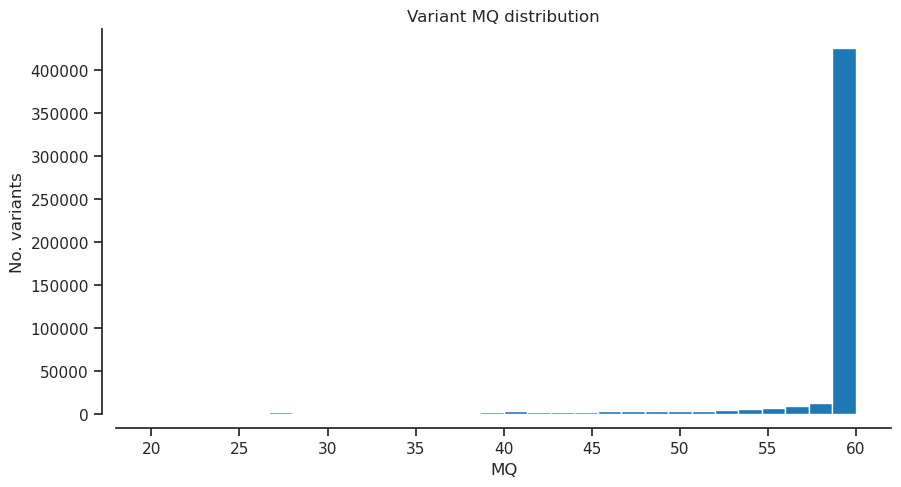

In [16]:
plot_hist('MQ','var') # RMS mapping quality

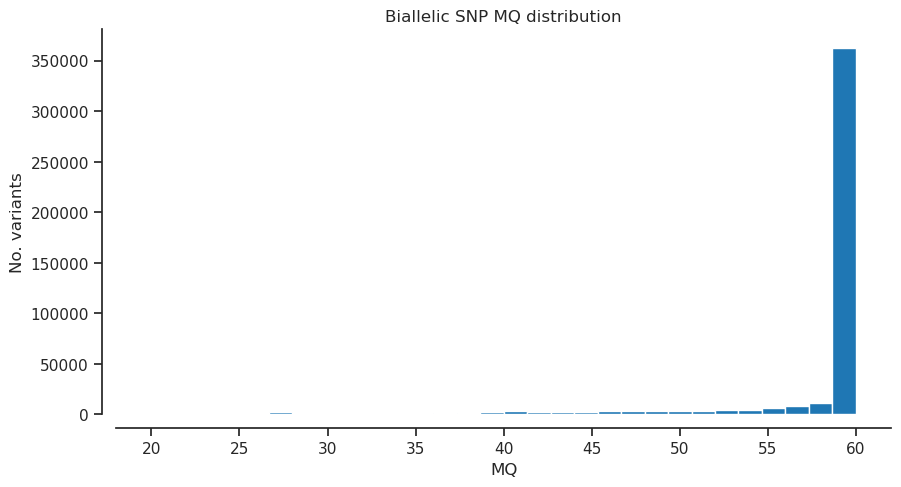

In [17]:
plot_hist('MQ','biallelic') # RMS mapping quality

In [18]:
filter_expression = '(MQ < 55)'
bi_selection = biallelic_np.query(filter_expression)[:]
#np.count_nonzero(var_selection)

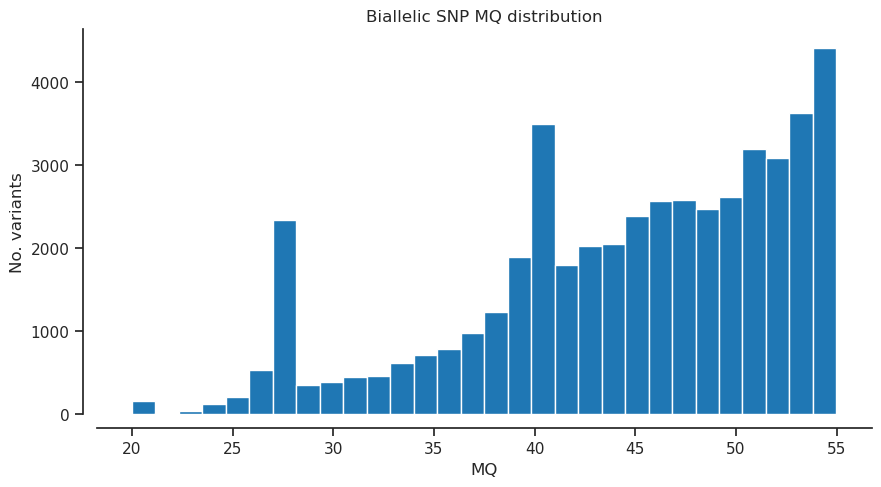

In [19]:
plot_hist('MQ')

In [20]:
filter_expression = '(MQ < 40)'
bi_selection = biallelic_np.query(filter_expression)[:]

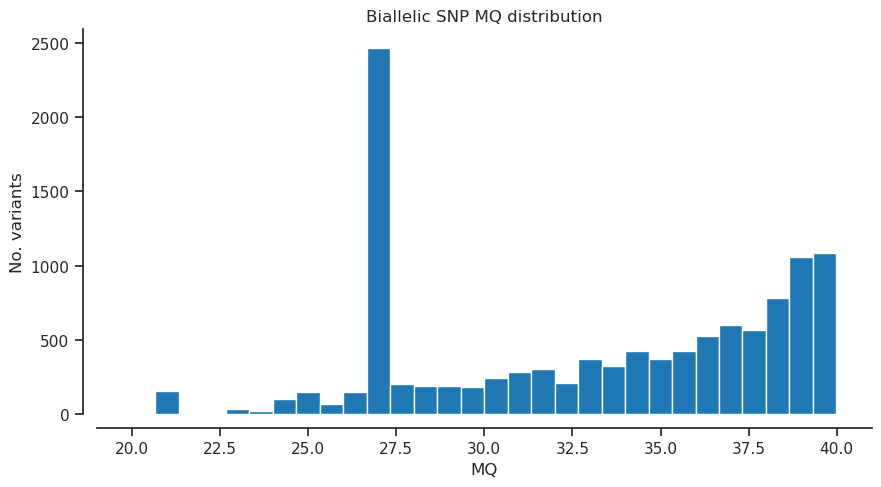

In [21]:
plot_hist('MQ')

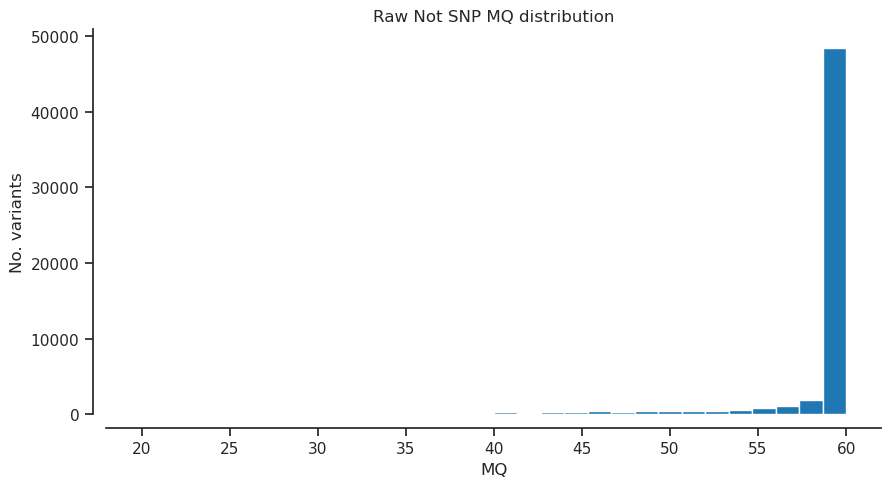

In [22]:
plot_hist('MQ','notsnp')

## QD - Variant Confidence/Quality by Depth

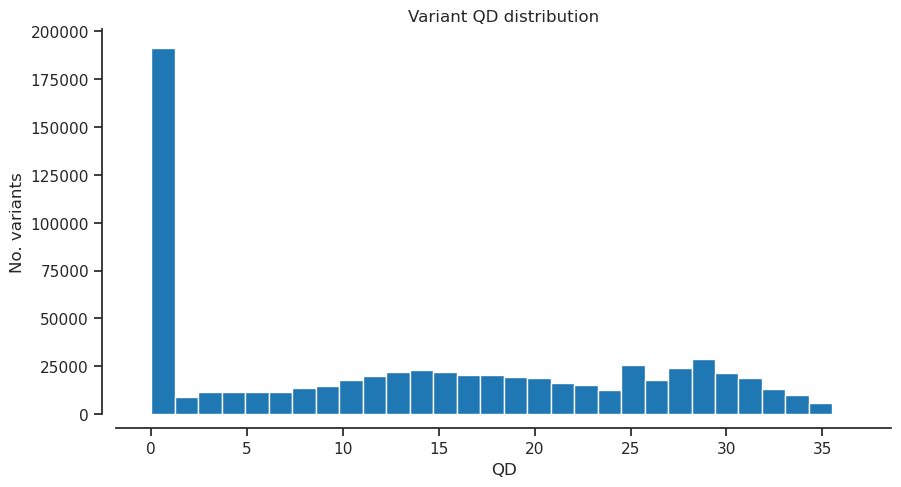

In [23]:
plot_hist('QD','var') # Variant Confidence/Quality by Depth

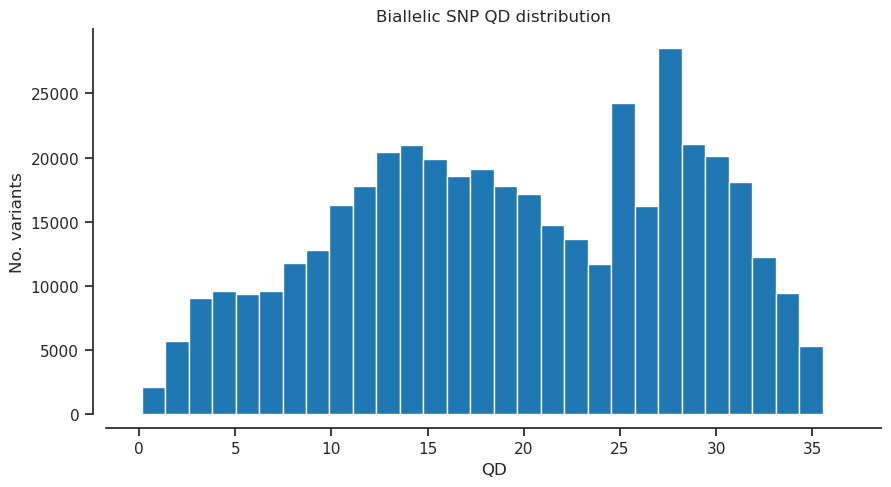

In [24]:
plot_hist('QD','biallelic') # Variant Confidence/Quality by Depth

In [25]:
filter_expression = '(QD < 2)'
bi_selection = biallelic_np.query(filter_expression)[:]

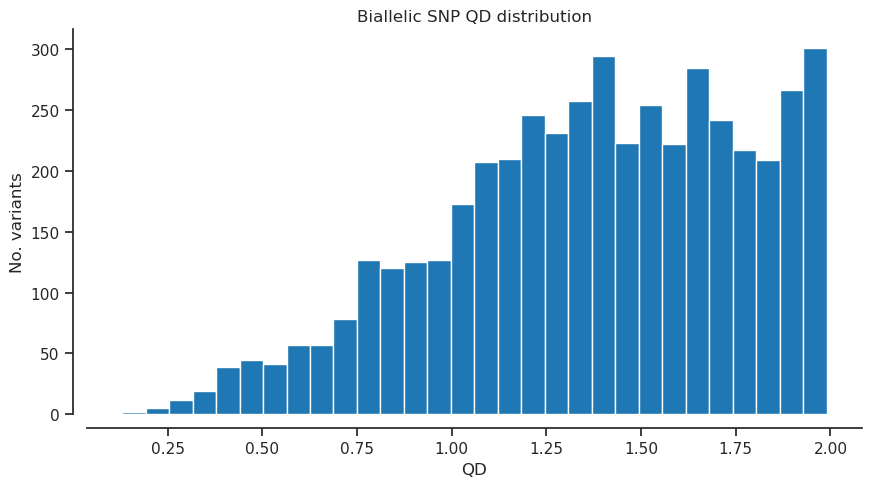

In [26]:
plot_hist('QD')

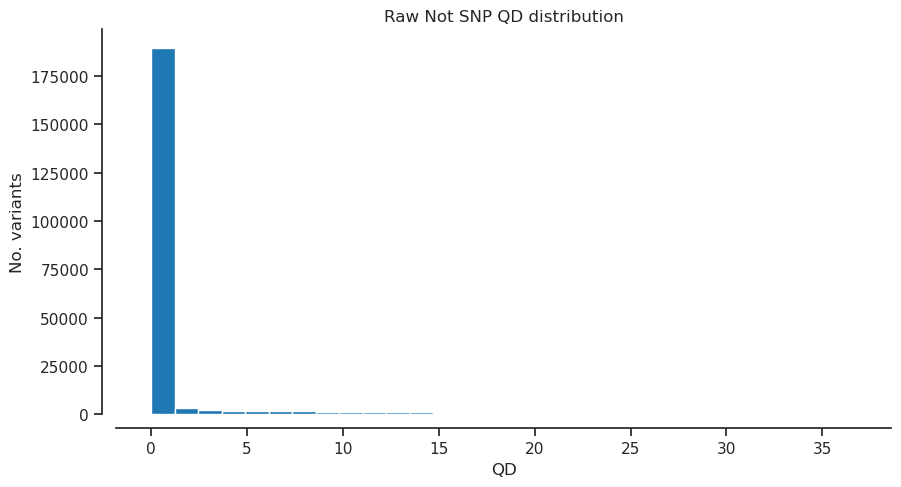

In [27]:
plot_hist('QD','notsnp') # Variant Confidence/Quality by Depth

## SOR - Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

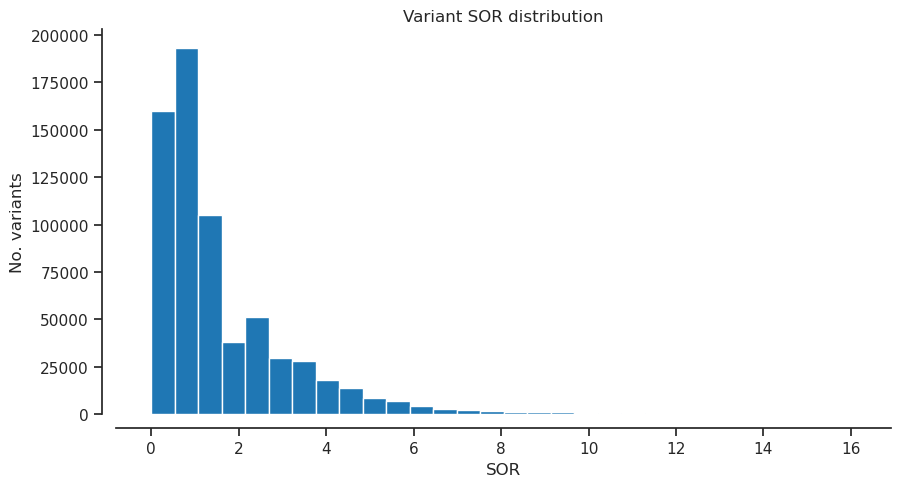

In [28]:
plot_hist('SOR', 'var') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

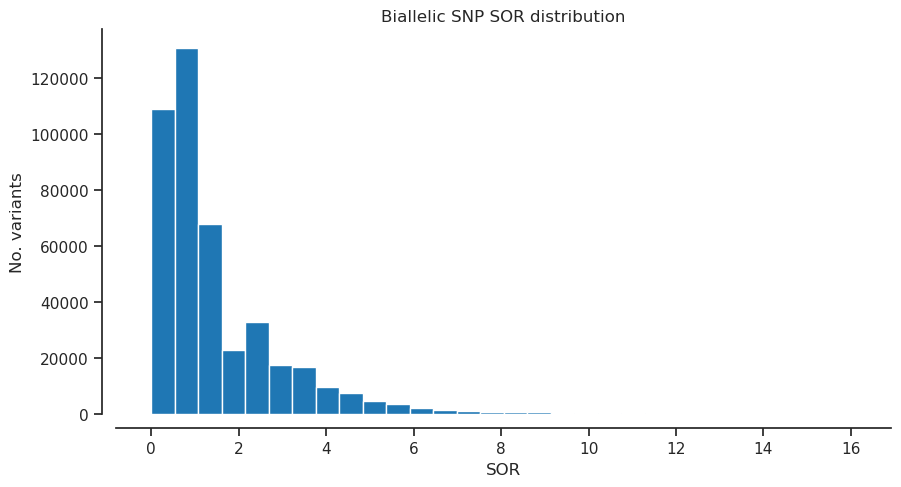

In [29]:
plot_hist('SOR','biallelic') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

In [30]:
filter_expression = '(SOR > 3)'
bi_selection = biallelic_np.query(filter_expression)[:]

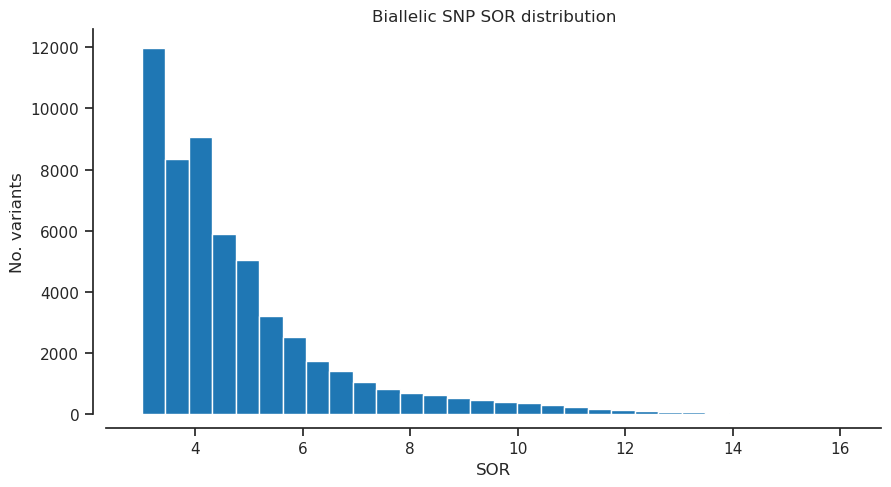

In [31]:
plot_hist('SOR') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

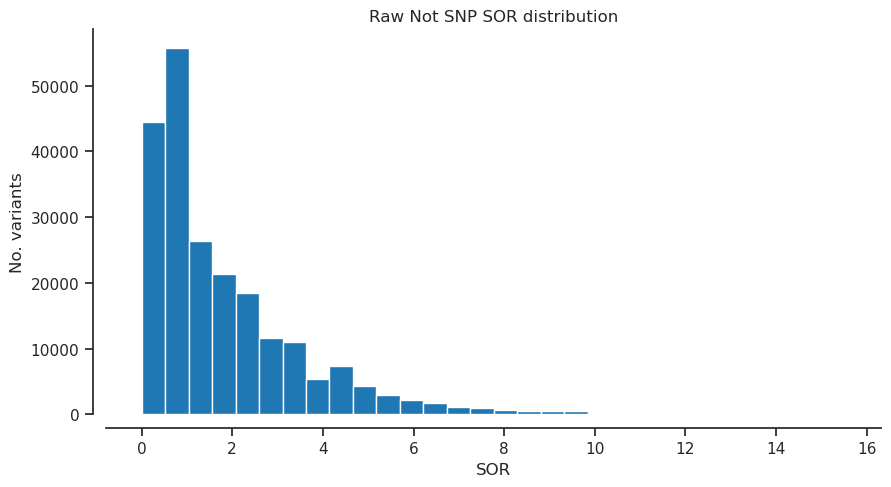

In [32]:
plot_hist('SOR','notsnp') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

## MQRankSum - Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

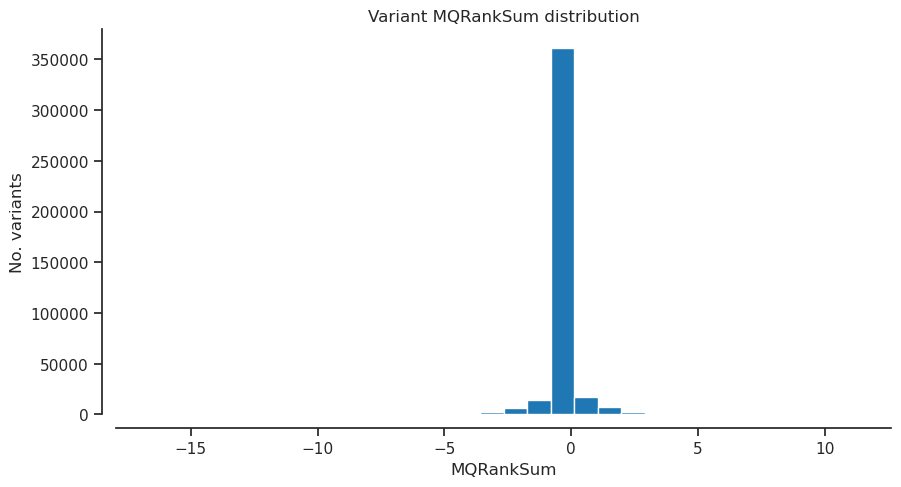

In [33]:
plot_hist('MQRankSum','var') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

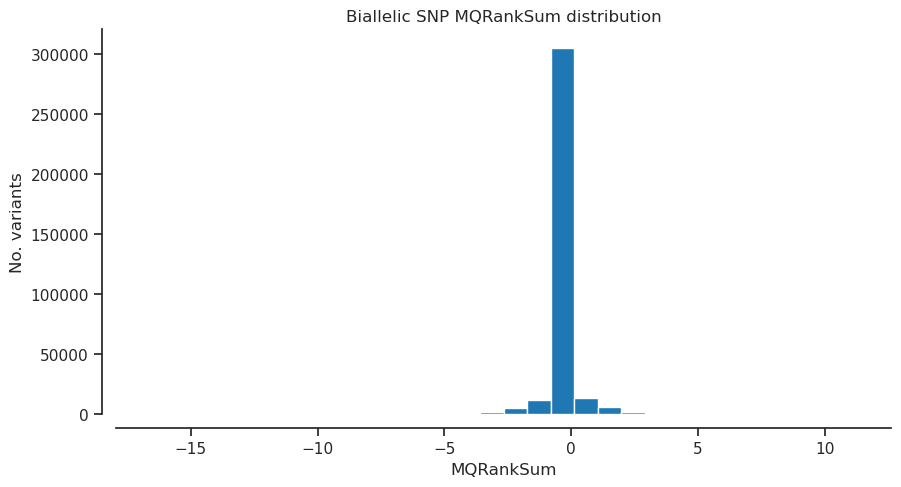

In [34]:
plot_hist('MQRankSum','biallelic') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

In [35]:
filter_expression = '(MQRankSum < -12.5)'
bi_selection = biallelic_np.query(filter_expression)[:]

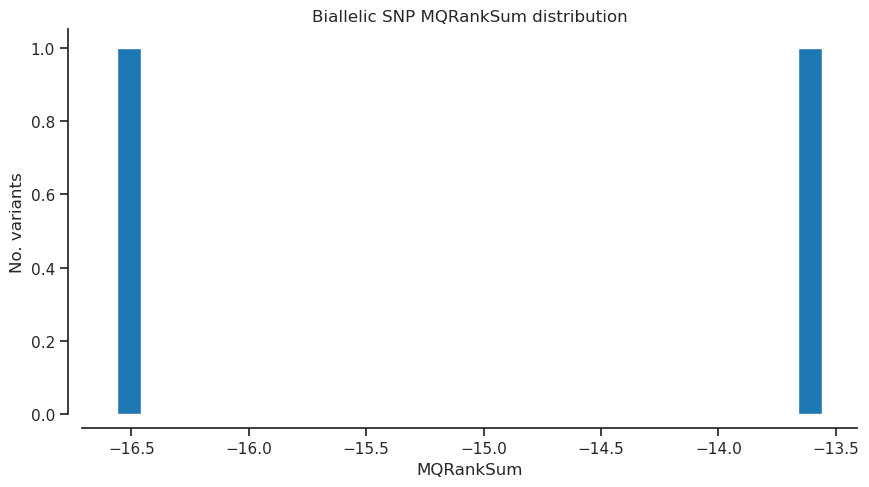

In [36]:
plot_hist('MQRankSum') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

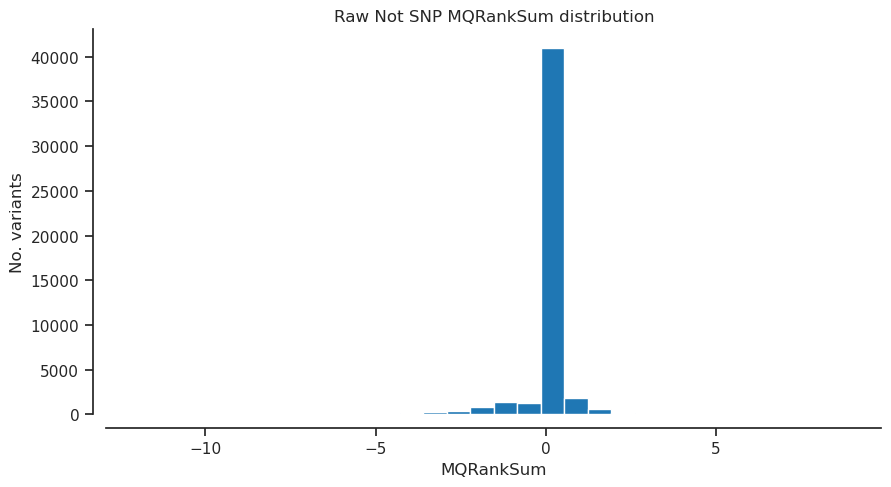

In [37]:
plot_hist('MQRankSum','notsnp') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

## ReadPosRankSum - Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

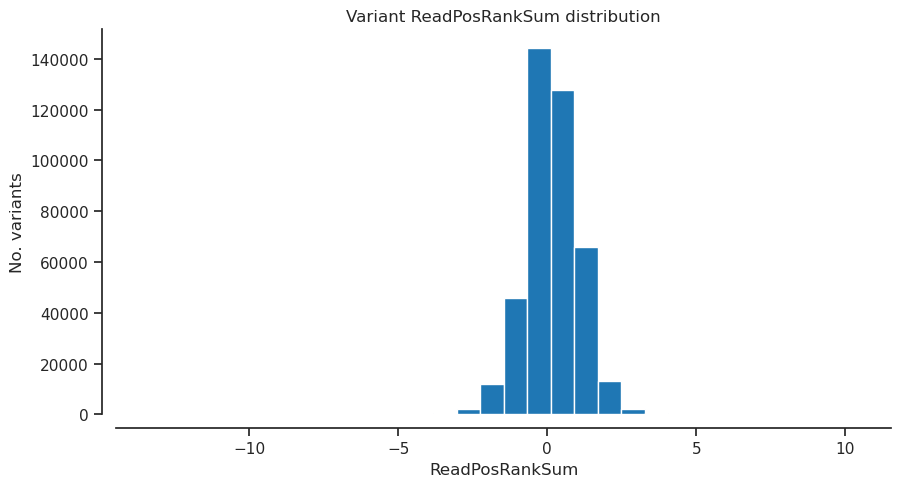

In [38]:
plot_hist('ReadPosRankSum','var') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

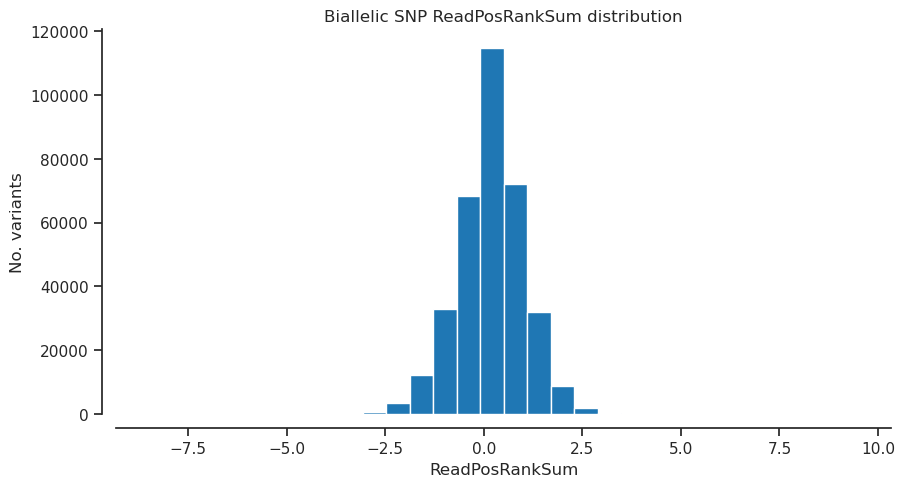

In [39]:
plot_hist('ReadPosRankSum','biallelic') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

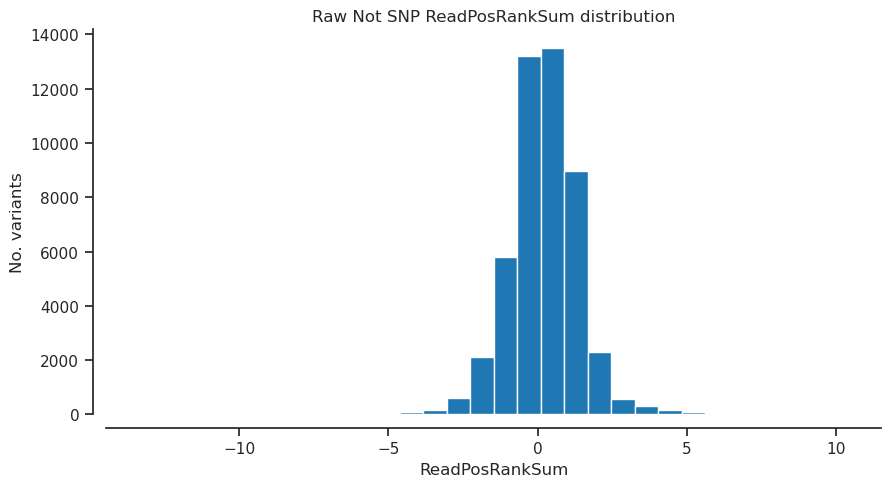

In [40]:
plot_hist('ReadPosRankSum','notsnp') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

## DP - Approximate read depth

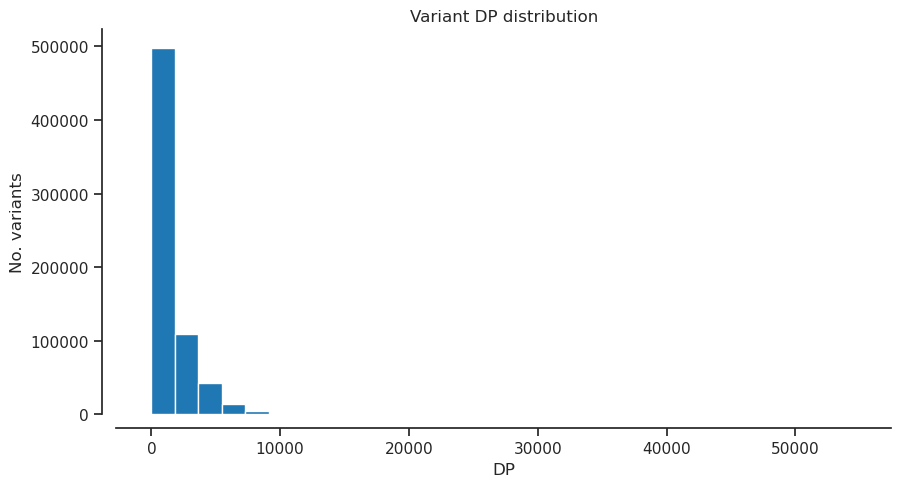

In [41]:
plot_hist('DP','var')

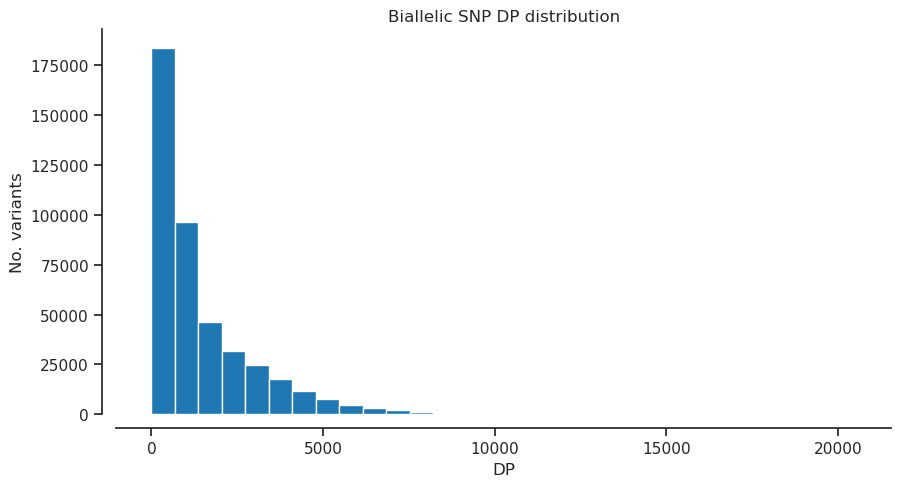

In [42]:
plot_hist('DP','biallelic')

In [43]:
filter_expression = '(DP > 20000) & (DP < 40000)'
bi_selection = biallelic_np.query(filter_expression)[:]

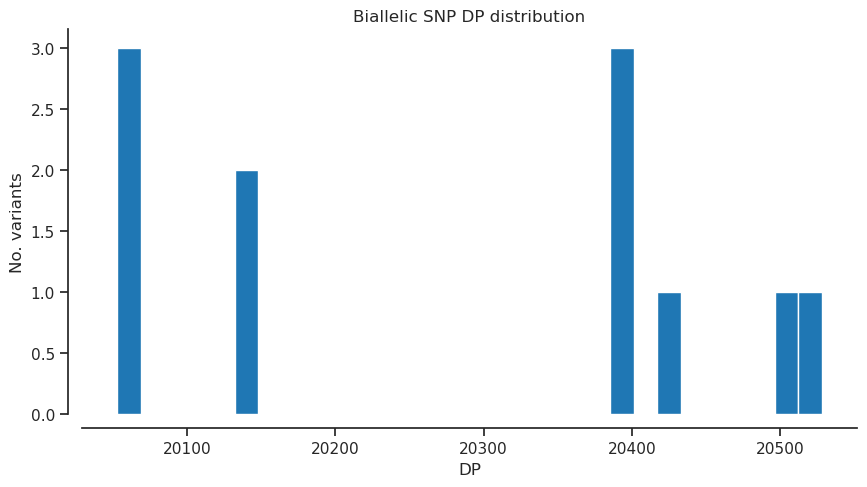

In [44]:
plot_hist('DP')

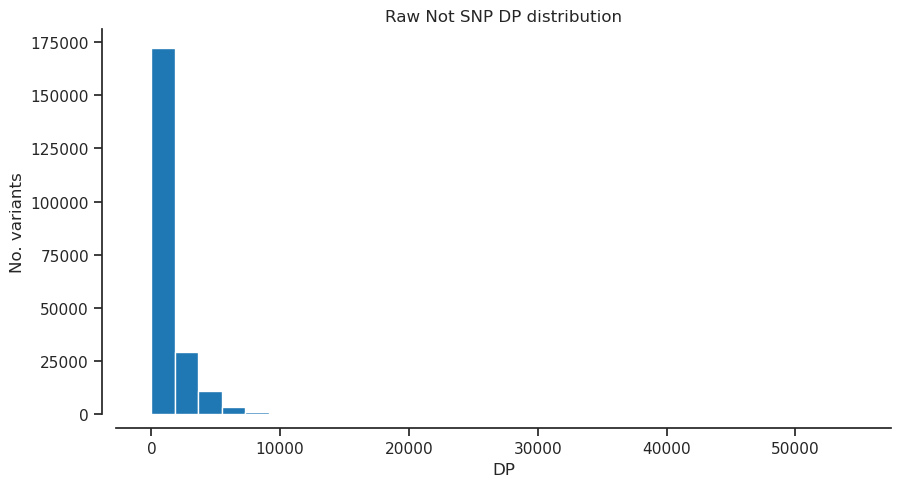

In [45]:
plot_hist('DP','notsnp')

## AN - Total number of alleles in called genotypes

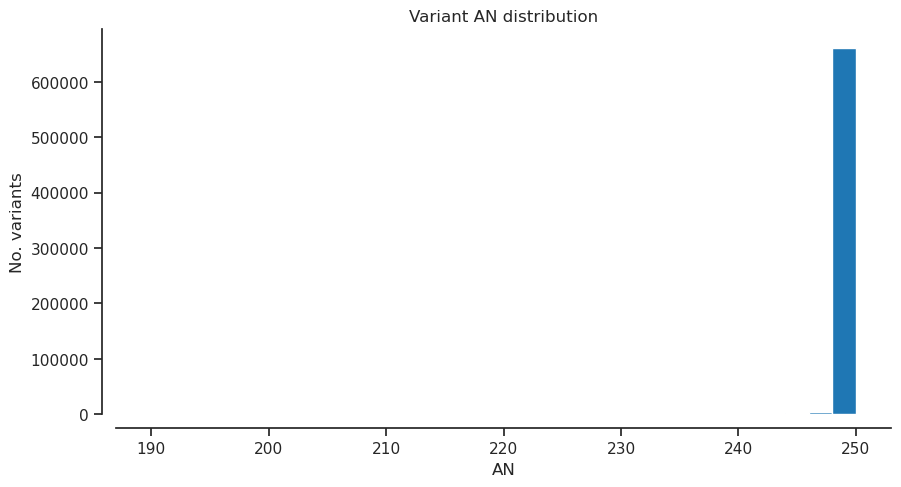

In [46]:
plot_hist('AN','var') # Total number of alleles in called genotypes

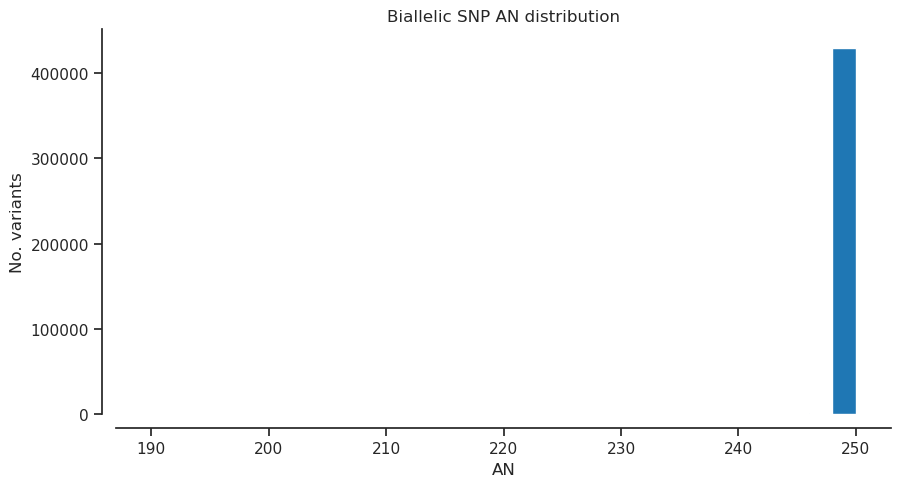

In [47]:
plot_hist('AN','biallelic') # Total number of alleles in called genotypes

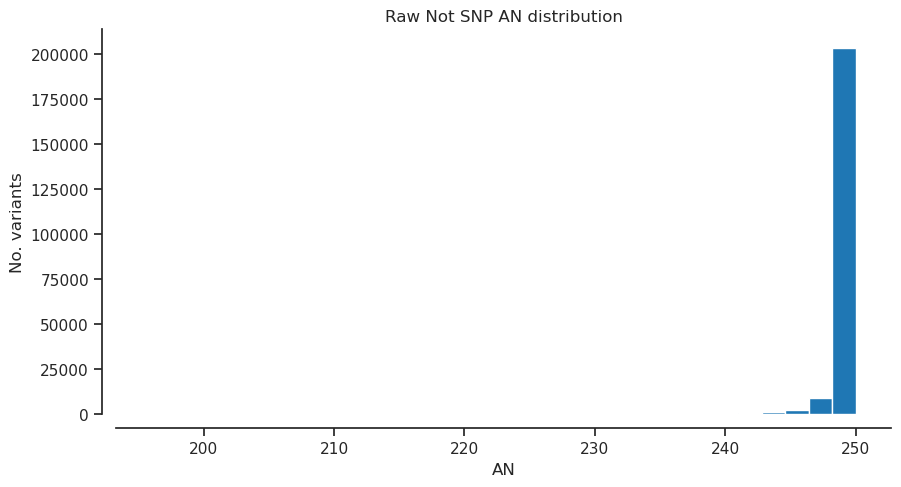

In [48]:
plot_hist('AN','notsnp') # Total number of alleles in called genotypes

## Selected filter

In [49]:
# QD: Variant Confidence/Quality by Depth
# AN: Total number of alleles in called genotypes
filter_expression = '(QD >= 2) & (MQ >= 40) & (MQRankSum >= -12.5) & (is_snp)'
variant_selection = variants_np.eval(filter_expression)[:]
np.count_nonzero(variant_selection)

354570

## Genotype

In [50]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [51]:
genotypes_var = allel.GenotypeChunkedArray(calldata_var['GT'])
genotypes_var

<GenotypeChunkedArray shape=(670805, 125, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=159.9M cbytes=8.7M cratio=18.3
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [52]:
# using the selected filters set above
gt_filtered_snps = genotypes_var.subset(variant_selection)
gt_filtered_snps

<GenotypeChunkedArray shape=(354570, 125, 2) dtype=int8 chunks=(5541, 125, 2)
   nbytes=84.5M cbytes=8.9M cratio=9.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [53]:
# grab the allele counts for the populations
ac = gt_filtered_snps.count_alleles()
ac

<AlleleCountsChunkedArray shape=(354570, 4) dtype=int32 chunks=(22161, 4)
   nbytes=5.4M cbytes=651.4K cratio=8.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [54]:
ac[:]

<AlleleCountsArray shape=(354570, 4) dtype=int32>
249   1   0   0
238  12   0   0
249   1   0   0
...
247   3   0   0
240   2   8   0
241   9   0   0

In [55]:
# Which ones are biallelic?
is_biallelic_01 = ac.is_biallelic_01()[:]
ac1 = ac.compress(is_biallelic_01, axis=0)[:, :2]
ac1
##this part of the code is only for graphing the SFS, is not useful for filtering biallelic sites

array([[249,   1],
       [238,  12],
       [249,   1],
       ...,
       [247,   3],
       [247,   3],
       [241,   9]], dtype=int32)

<Axes: xlabel='derived allele frequency', ylabel='site frequency'>

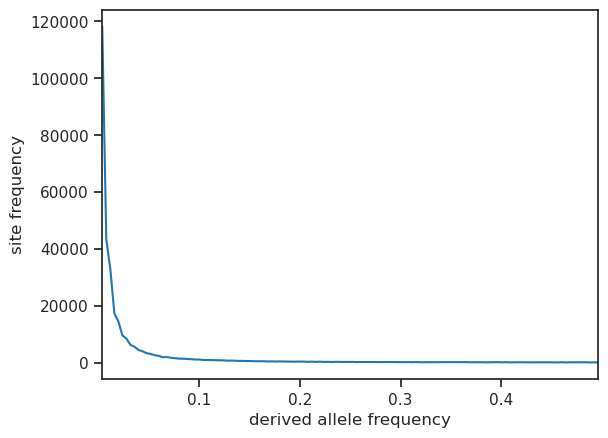

In [56]:
# plot the sfs of the derived allele
s = allel.sfs_folded(ac1)
allel.plot_sfs(s, yscale="linear", n=ac1.sum(axis=1).max())

In [57]:
biallelic = (ac.max_allele() == 1)
###This is the filter expression for biallelic sites
biallelic

<ChunkedArrayWrapper shape=(354570,) dtype=bool chunks=(177285,)
   nbytes=346.3K cbytes=66.9K cratio=5.2
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [58]:
# select only the biallelic variants
gt_biallelic = gt_filtered_snps.compress(biallelic)
gt_biallelic

<GenotypeChunkedArray shape=(336497, 125, 2) dtype=int8 chunks=(5258, 125, 2)
   nbytes=80.2M cbytes=8.2M cratio=9.8
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [59]:
n_variants = len(gt_biallelic)
n_variants

336497

In [60]:
pc_missing = gt_biallelic.count_missing(axis=0)[:] * 100 / n_variants
pc_het = gt_biallelic.count_het(axis=0)[:] * 100 / n_variants

## Samples

In [61]:
samples_var = callset_var['samples']
samples_var = list(samples_var)
samples_var

[b'BIH00040-001',
 b'BIH00040-002',
 b'BIH00040-003',
 b'BIH00040-004',
 b'BIH00040-005',
 b'BIH00040-006',
 b'BIH00040-007',
 b'BIH00040-008',
 b'BIH00040-009',
 b'BIH00040-010',
 b'BIH00040-011',
 b'BIH00040-012',
 b'BIH00040-013',
 b'BIH00040-014',
 b'BIH00040-015',
 b'BIH00040-016',
 b'BIH00040-017',
 b'BIH00040-018',
 b'BIH00040-019',
 b'BIH00040-020',
 b'BIH00040-021',
 b'BIH00040-022',
 b'BIH00040-023',
 b'BIH00040-024',
 b'BIH00040-025',
 b'HUN00008-001',
 b'HUN00008-002',
 b'HUN00008-003',
 b'HUN00008-004',
 b'HUN00008-005',
 b'HUN00008-006',
 b'HUN00008-007',
 b'HUN00008-008',
 b'HUN00008-009',
 b'HUN00008-010',
 b'HUN00008-011',
 b'HUN00008-012',
 b'HUN00008-013',
 b'HUN00008-014',
 b'HUN00008-015',
 b'HUN00008-016',
 b'HUN00008-017',
 b'HUN00008-018',
 b'HUN00008-019',
 b'HUN00008-020',
 b'HUN00008-021',
 b'HUN00008-022',
 b'HUN00008-023',
 b'HUN00008-024',
 b'HUN00008-025',
 b'HUN00010-001',
 b'HUN00010-002',
 b'HUN00010-003',
 b'HUN00010-004',
 b'HUN00010-005',
 b'HUN0001

In [62]:
samples_fn = '~/scratch/data/Qpubescens/Quercus_pubescens_sample_list_scikit-allel.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,BIH00040-001,BIH00040
1,BIH00040-002,BIH00040
2,BIH00040-003,BIH00040
3,BIH00040-004,BIH00040
4,BIH00040-005,BIH00040
...,...,...
120,SVN00040-021,SVN00040
121,SVN00040-022,SVN00040
122,SVN00040-023,SVN00040
123,SVN00040-024,SVN00040


In [63]:
samples.Population.value_counts()

Population
BIH00040    25
HUN00008    25
HUN00010    25
ROU00385    25
SVN00040    25
Name: count, dtype: int64

In [64]:
populations = samples.Population.unique()
populations
###This identifiers come from the metadata file

array(['BIH00040', 'HUN00008', 'HUN00010', 'ROU00385', 'SVN00040'],
      dtype=object)

## Gt frequency function

In [65]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 5)
    pop2color = {'BIH00040': palette[0],
                 'HUN00008': palette[3],
                 'HUN00010': palette[1],
                 'ROU00385': palette[4],
                 'SVN00040': palette[2]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[2])]
    ax.legend(handles=handles, labels=['BIH00040', 'HUN00008', 'HUN00010', 'ROU00385', 'SVN00040'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

## Plot missing

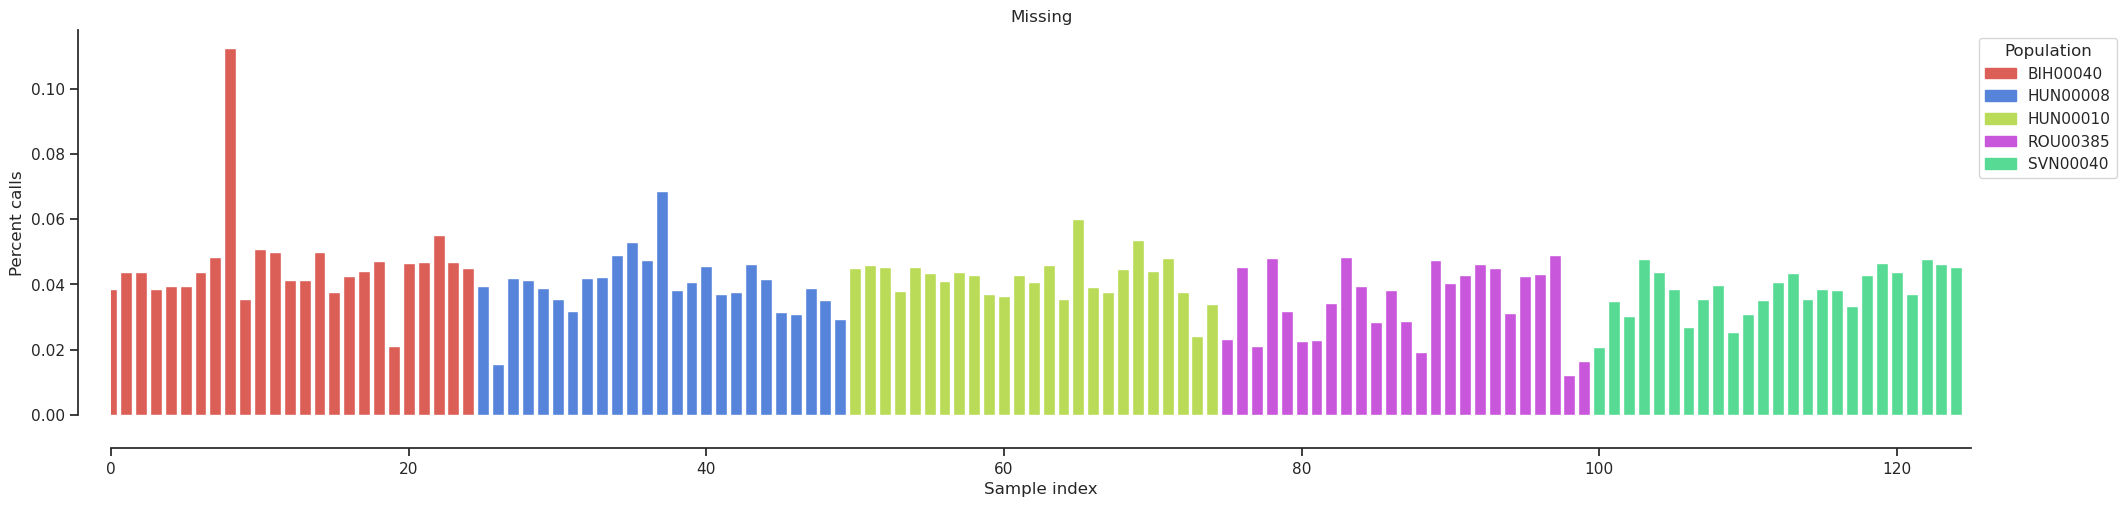

In [66]:
plot_genotype_frequency(pc_missing, 'Missing')

## Plot heterozygosity

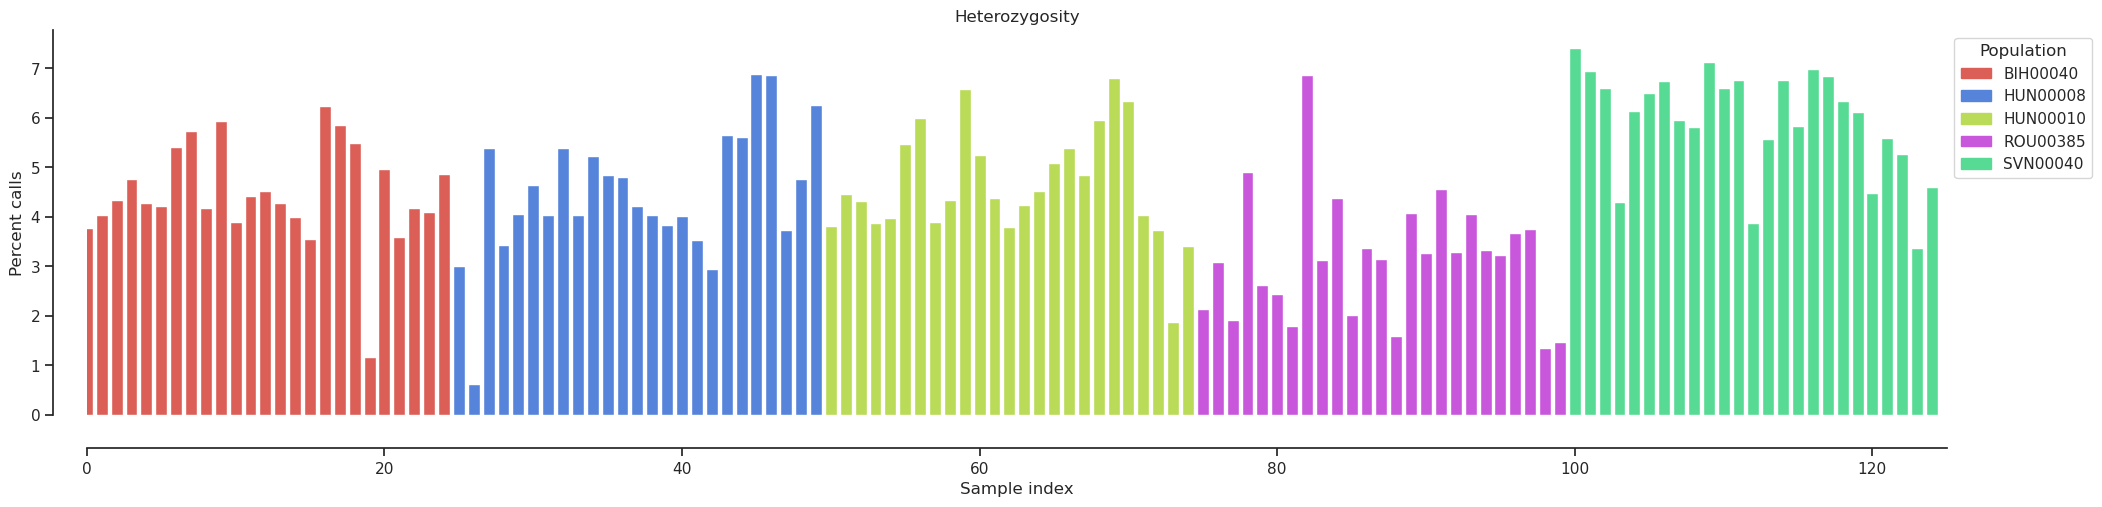

In [67]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

## PCA

In [68]:
palette = sns.color_palette("hls",5)
pop_colours = {    
                'BIH00040': palette[0],
                 'HUN00008': palette[3],
                 'HUN00010': palette[1],
                 'ROU00385': palette[4],
                 'SVN00040': palette[2]
}

In [69]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [70]:
ac2 = gt_biallelic.count_alleles()
ac2

<AlleleCountsChunkedArray shape=(336497, 2) dtype=int32 chunks=(42063, 2)
   nbytes=2.6M cbytes=488.5K cratio=5.4
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [71]:
flt = (ac2[:, :2].min(axis=1) > 1)
gf = gt_biallelic.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(218252, 125) dtype=int8 chunks=(6821, 125)
   nbytes=26.0M cbytes=5.4M cratio=4.8
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [72]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

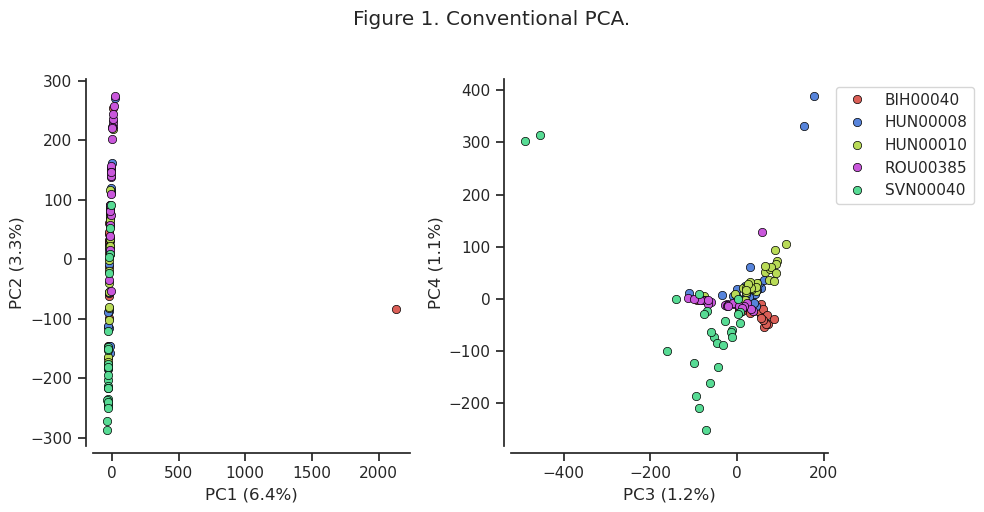

In [73]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')

In [74]:
outliers = coords1[:,0]>1000
samples[outliers]

,ID,Population
8,BIH00040-009,BIH00040


In [75]:
pc_het[outliers]

array([4.17121104])

In [76]:
pc_missing[outliers]

array([0.11233384])